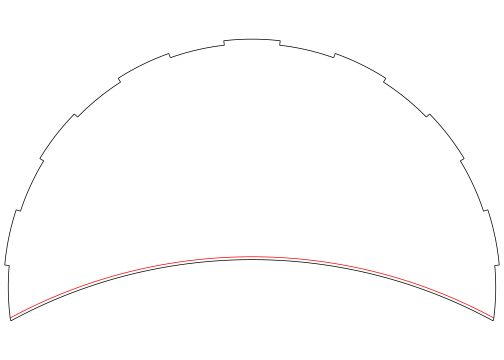

In [1]:
import drawSvg as draw
import math
from scipy.optimize import newton
from sympy.solvers import solve
from sympy import Symbol, asin

DRAWING_HEIGHT = 5
DRAWING_WIDTH = 7

d = draw.Drawing(DRAWING_WIDTH, DRAWING_HEIGHT, origin='center')
g = draw.Group(stroke_width=0.01, fill="none", stroke="black")



    
    
    
    
    
    
    
    
    


material_thickness = 1/16
gap = 0.04

def height_length_to_radius(h, l):
    return newton(
        lambda r: math.cos(l/(2*r)) - ((r-h)/r),
        l/math.pi
    )

def radius_height_to_width(r, s):
    return math.sqrt( (2*s*r) - s**2 ) * 2

def height_width_to_radius(h, w):
    return -( (-(w/2)**2 - h**2) / (2 * h) )

def radius_width_to_length(r, w):
    angle = 2 * math.asin((w / 2) / r)
    return angle * r

def radius_height_to_angle(r, h):
    return 

class PaperArc:
    length = 7 # Input
    height = 0.85 # Input
    radius = height_length_to_radius(height, length)
    width = radius_height_to_width(radius, height)
    angle = math.degrees(length / radius)
    
    
class InnerEdgeArc:
    height = 3 - gap # Input
    width = PaperArc.width # Input
    radius = height_width_to_radius(height, width)
    length = radius_width_to_length(radius, width)
    
    # angle based on self.radius, self.height = height + PaperArc.height + gap
    angle = 195.78486

    
class FaceArc:
    radius = PaperArc.radius - gap # Input
    height = PaperArc.height # Input
    length = 6.98056
    width = 6.69645
    angle = 56.97807

    
class OuterEdgeArc:
    radius = InnerEdgeArc.radius + material_thickness # Input
    height = InnerEdgeArc.height + gap + PaperArc.height + material_thickness # Input
    length = 11.76367
    width =  6.83238
    angle = 195.49693

    
def hypotenuse_angle_to_base_height(hypotenuse, angle):
    base = hypotenuse * math.cos(math.radians(angle))
    height = hypotenuse * math.sin(math.radians(angle))
    return(base, height)
    
Y_OFFSET = -(PaperArc.radius - InnerEdgeArc.radius + InnerEdgeArc.height)

paper = draw.Path(stroke="red")
paper.arc(0, Y_OFFSET, PaperArc.radius, 
          90 - (PaperArc.angle / 2), 
          90 + (PaperArc.angle / 2))
g.append(paper)

face = draw.Path()
face.arc(0, Y_OFFSET, FaceArc.radius, 
          90 - (FaceArc.angle / 2), 
          90 + (FaceArc.angle / 2))
g.append(face)


TAB_COUNT = 15
DEGREES = InnerEdgeArc.angle / TAB_COUNT
for i in range(15):
    radius = InnerEdgeArc.radius if i % 2 == 0 else OuterEdgeArc.radius
    angle_start = 90 - DEGREES/2 + (DEGREES * (-(math.floor(TAB_COUNT/2)) + i))
    angle_end = 90 + DEGREES/2 + (DEGREES * (-(math.floor(TAB_COUNT/2)) + i))
    
    p = draw.Path()
    p.arc(0, 0, radius, angle_start, angle_end)
    g.append(p)
    
    if i < TAB_COUNT - 1:
        g.append(
            draw.Line(
                hypotenuse_angle_to_base_height(InnerEdgeArc.radius, angle_end)[0], 
                hypotenuse_angle_to_base_height(InnerEdgeArc.radius, angle_end)[1],
                hypotenuse_angle_to_base_height(OuterEdgeArc.radius, angle_end)[0], 
                hypotenuse_angle_to_base_height(OuterEdgeArc.radius, angle_end)[1], 
            )
        )

# Center the shape
g.args['transform'] = "translate(0 {})".format(
    -((OuterEdgeArc.height - OuterEdgeArc.radius) - 
      OuterEdgeArc.height/2)
)

d.append(g)

d.setPixelScale(72)  # Set number of pixels per geometry unit
d.saveSvg('output.svg')
# Display in iPython notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [12]:
radius_width_to_length(InnerEdgeArc.radius, InnerEdgeArc.width)

9.782236353518902

In [46]:
tries = []
rs = []
r = 6.9
for _ in range(10000):
    res = f(r)
    if res > 0:
        tries.append(res)
        rs.append(r)
        break
    r += 0.1
    
print(min(tries))
i = (int(tries.index(min(tries))))
print(rs[i])

0.000655318997575538
7.1


In [28]:
len(tries)

1

In [19]:
y = [1, 2, None]

In [21]:
[x for x in y if x]

[1, 2]

In [10]:
def radius_sagitta_chord(r=None, s=None, c=None):
    """
    Calcautes the sagitta, radius or chord of an arc given any two
    of these values
    """
    if len([x for x in [r, s, c] if x]) != 2:
        raise Exception('2 inputs are required')
        
    if s is None:
        s = Symbol('s')
        val_name = 'sagitta'
    elif r is None:
        r = Symbol('r')
        val_name = 'radius'
    elif c is None:
        c = Symbol('c')
        val_name = 'chord'

    val = abs(
        float(solve(r - (r**2 - (c/2)**2)**(1/2) - s)[0])
    )
    return val


In [15]:
x = radius_sagitta_chord(s=3.85, r=3.3852)

IndexError: list index out of range

In [14]:
x

1.7320508075688772

In [31]:
def arc_circ_chord_radius(circ=None, c=None, r=None):
    if circ is None:
        chord = Symbol('circ')
    elif r is None:
        r = Symbol('r')
    elif c is None:
        c = Symbol('c')

    return float(solve((2 * asin(3.358345 / 7.059)) -x , x)[0])


    
        

In [32]:
arc_circ_chord_radius()

TypeError: unsupported operand type(s) for -: 'Float' and 'dict'

In [101]:
from sympy import sin, cos, asin, symbols

In [103]:
solve([sin(x + y), cos(x - y)], [x, y])

[(-3*pi/4, 3*pi/4), (-pi/4, pi/4), (pi/4, 3*pi/4), (3*pi/4, pi/4)]

In [102]:
x, y, z, t = symbols('x y z t')

In [ ]:
'radius, chord, angle, sagitta'

In [16]:
def t(**kwargs):
    print(kwargs.keys())
    
t(one=2, three=4)

dict_keys(['one', 'three'])


In [26]:
s = {1, 2,3}
s.difference({1, 3})


{2}

In [21]:
x = {'1': 2}

In [ ]:
from itertools import combinations
t = {
    'radius': 3.25,
    'length': 5.2397,
    'chord': 4.6904,
    'sagitta': 1,
    'angle': 1.6122
}


for x in list(combinations(CircleArc.fields, 2)):
    print(x)
    c = CircleArc(**{x[0]: t[x[0]], x[1]: t[x[1]]})
    try:
        assert math.isclose(t['radius'], c.results['radius'], rel_tol=.003)
        assert math.isclose(t['length'], c.results['length'], rel_tol=.003)
        assert math.isclose(t['chord'], c.results['chord'], rel_tol=.003)
        assert math.isclose(t['sagitta'], c.results['sagitta'], rel_tol=.003)
        assert math.isclose(t['angle'], c.results['angle'], rel_tol=.003)
    except Exception as e:
        print(c.results)
        raise e
    
    



('radius', 'sagitta')
('radius', 'length')
('radius', 'chord')
('radius', 'angle')
('sagitta', 'length')
('sagitta', 'chord')
('sagitta', 'angle')
('length', 'chord')
('length', 'angle')


In [23]:
radius = 3.25
sagitta = 2
math.sqrt((2*radius*sagitta)-sagitta*2)

3.0